In [688]:
import pandas as pd
import re
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_excel('homework_with_2680_rows.xls')
df['const_year'] = df['description'].str.findall('[0-9]{4}',flags=re.IGNORECASE).str[0].astype('int64')

In [65]:
min(df['const_year'])

1960

In [66]:
df.to_excel('df_formatted.xls',encoding='utf8')

In [184]:
df = df.loc[(np.isnan(df['lat']) == False)]

In [139]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "krisha_app")

In [185]:
def overall_crime(lat,lon):
    print(lat,lon)
    location = geolocator.reverse("{}, {}".format(lat,lon),exactly_one=True,zoom=18)
    bbox  = (location.raw['boundingbox'])
    r = requests.get('https://krisha.kz/ms/geodata/crime?bounds={}%2C{}%2C{}%2C{}&limit=1000&fields=crime_title%2Chard_code%2Cdate_excitation&from=08.02.2020'.format(float(bbox[3]),float(bbox[1]),float(bbox[2]),float(bbox[0])))
    crimes = r.json()

    total_hardness = 0
    for i in crimes:
        total_hardness += int(i['hard_code'])
    if len(crimes) == 0:
        return 0
    else:
        return (total_hardness/len(crimes))

In [186]:
df['crime'] = df.apply(lambda row: overall_crime(row.lat,row.lon), axis=1)

51.130134 71.371347
51.16446 71.440104
51.099105072306 71.429398610877
51.122995 71.395269
51.117432 71.394155
51.166267 71.406893
51.156331 71.483645
51.129196 71.589682
51.112748 71.430139
51.126002761219 71.434661147359
51.165488 71.386097
51.140239037165 71.414765525406
51.122492182397 71.263259994763
51.114051 71.438891
51.128375599537 71.409212767029
51.146066 71.457334
51.091003 71.404378
51.1578 71.501459
51.084176527452 71.430786791332
51.099105072306 71.429398610877
51.169949 71.395736
51.11902 71.41858
51.123068 71.485568
51.11449331611 71.393523572812
51.095301216937 71.420862090323
51.087586011104 71.42876353873
51.122591852109 71.499097215364
51.167233 71.461071
51.161777 71.461493
51.11651 71.456453
51.157614 71.439322
51.0436804215 71.436144267365
51.377885746055 72.033528566181
51.143551 71.472327
51.164612 71.439316
51.116836945898 71.52175571508
51.148015 71.467053
51.116368256958 71.439788234198
51.164601 71.438361
51.126034413975 71.394545762162
51.160761052952 71.

51.173146 71.418086
51.139629 71.46702
51.154998 71.366011
51.161059 71.477213
51.167555 71.390059
51.09676703924 71.445109080571
51.145913 71.374168
51.114124 71.497542
51.167634 71.462625
51.155213 71.505151
51.138612 71.469569
51.170661 71.383843
51.145563 71.423764
51.188797 71.406525
51.155077 71.520153
51.159817 71.405824
51.129902548682 71.359519606124
51.135205651399 71.466109278036
51.167634 71.462625
51.109646 71.538802
51.173665 71.380653
51.127103179403 71.494196169689
51.158088 71.498692
51.119343 71.440616
51.206298828125 71.386901855469
51.104454 71.434292
51.112194775776 71.537277154502
51.130119344399 71.436813285472
51.105506 71.434948
51.16006 71.408546
51.132716 71.228126
51.147159636401 71.369340386591
51.197943899079 71.385894399136
51.123244 71.522138
51.112919969016 71.427108005779
51.170757 71.463685
51.16346 71.45922
51.145823203566 71.469970985458
51.121762 71.432504
51.119473 71.506373
51.147159636401 71.369340386591
51.169640493571 71.44827067852
51.122808 

51.136199720924 71.364490941309
51.145348 71.462517
51.169437369595 71.39136509577
51.13447 71.462032
51.125776 71.501207
51.096105761412 71.436557322754
51.16224 71.460684
51.180378680377 71.405763930357
51.148382 71.477618
51.126488 71.501755
51.176167 71.422416
51.076166320492 71.43144624571
51.119541 71.455259
51.105506 71.434948
51.110774313474 71.433447636293
51.117103 71.459347
51.159715 71.498234
51.109277642317 71.538569927215
51.119416 71.429504
51.183462 71.369802
51.163285 71.448979
51.17160223807 71.404061939502
51.171 71.417996
51.11523 71.413549
51.162057734679 71.419821292293
51.088769 71.425515
51.139432 71.477752
51.107776877507 71.540031958121
51.041267 71.429702
51.136870065684 71.426457447376
51.095792807351 71.435935546261
51.113751 71.455762
51.139364 71.489754
51.139918447117 71.36638095988
51.114124 71.497542
51.154861719445 71.521094698798
51.146662912456 71.368957742783
51.095354327041 71.423058152886
51.09997658339 71.428889732153
51.161127 71.465886
51.1627

51.171224030353 71.385074009925
51.126393481381 71.502050042991
51.120373358534 71.504297215732
51.195125 71.389547
51.161190901282 71.409364480605
50.979977 71.359283
51.129172136508 71.362939218852
51.102554 71.396805
51.123139817431 71.485522146831
51.128412008178 71.4193467324
51.193042 71.408196
51.125771 71.362768
51.168093 71.401655
51.151552 71.371374
51.131067 71.502007
51.137414 71.470485
51.116482 71.423225
51.122215 71.500731
51.119473 71.504495
51.13729 71.401369
51.120473 71.498126
51.126096767392 71.490565900957
51.163443306186 71.492644843238
51.101004509663 71.40182605911
51.133848 71.371493
51.115361660861 71.401343597728
51.146139 71.526729
51.160781055832 71.475527500117
51.180204 71.350201
51.156659 71.435999
51.087586011104 71.42876353873
51.1204 71.496869
51.162330606633 71.440329752513
51.112364268758 71.536746025085
51.090474131531 71.427907294396
51.14832 71.365193
51.105164899312 71.429210185399
51.147565544666 71.366727340912
51.179329 71.374653
51.094082722

51.105506 71.434948
51.155608 71.485559
51.115214912612 71.413647675991
51.158313303313 71.483334661614
51.12224847006 71.503033118122
51.104454 71.434292
51.168385 71.448216
51.097648 71.416263
51.119761 71.466137
51.116621 71.438844
51.119772 71.474977
51.126187235916 71.49084270545
51.136046 71.364241
51.125674 71.421949
51.138567 71.414152
51.102441 71.405743
51.118376 71.475866
51.154879 71.428552
51.161265268997 71.496682032739
51.085495806222 71.42829531904
51.121162855031 71.39672968546
51.161335896468 71.408834930771
51.126308 71.423081
51.164601 71.438361
51.162014 71.419542
51.13017105257 71.503062629792
51.127664 71.504118
51.110777 71.433403
51.156371 71.453489
51.167279126123 71.407888513058
51.146766904409 71.504945063824
51.167131 71.387166
51.137958386145 71.46865236049
51.127181261152 71.49427113545
51.095299 71.406973
51.137414 71.470485
51.127459563717 71.469039314022
51.118218642203 71.462881844491
51.181891320854 71.4058311976
51.145824 71.40446
51.133599 71.46129

51.155396283839 71.505388412763
51.132237 71.43502
51.128218433115 71.45863322541
51.161195 71.435433
51.090265365922 71.449807622389
51.136284 71.367817
51.178993152482 71.40726280931
51.138539 71.400767
51.173219 71.418796
51.13096 71.402213
51.104833 71.451378
51.123899 71.502582
51.124860598724 71.483709025924
51.167669199445 71.432259226567
51.117697 71.501872
51.138539 71.400767
51.125787 71.434472
51.130118367877 71.50310920144
51.128139060205 71.491566896439
51.151399 71.474599
51.123023 71.520593
51.190745167923 71.340041656918
51.110774313474 71.433447636293
51.125561705239 71.363030856483
51.086500029695 71.436236461886
51.14217904308 71.413044642123
51.151213 71.482451
51.105506 71.434948
51.139149961671 71.450652803005
51.127472 71.466883
51.15119 71.49703
51.151399 71.474599
51.146619 71.461744
51.143870020051 71.415752578323
51.118184 71.465266
51.11424 71.534021
51.153659 71.500749
51.116715 71.523705
51.099839913246 71.401105835304
51.111594399708 71.412625701346
51.11

51.174866 71.4059
51.098169653503 71.416258810057
51.19748129029 71.389848597279
51.114231144847 71.421857842555
51.192189120711 71.333146743332
51.120539655332 71.399651379208
51.144399 71.415257
51.118773336094 71.260671615601
51.161613 71.4018
51.12027 71.417754
51.090125481039 71.426728059024
51.154998 71.366011
51.165657 71.401665
51.124097 71.420009
50.585573741846 71.438545997395
51.114367 71.432801
51.152659 71.466802
51.152591 71.485595
51.117963 71.459229
51.084775 71.431673
51.186397 71.403704
51.113387175626 71.502353925299
51.112954 71.405303
51.155739767434 71.507710542465
51.119772 71.474977
51.116335 71.439718
51.110037722596 71.427172177754
51.113387175626 71.502353925299
51.157263 71.510262
51.16804 71.408699
51.126822 71.462562
51.118676 71.417251
51.162143115114 71.452828925103
51.114224970124 71.41542243611
51.175879 71.418041
51.148282874073 71.481304764748
51.161585505358 71.455400325358
51.155214434857 71.505264141401
51.138245 71.468347
51.171881 71.404441
51.1

51.128519840482 71.492883965749
51.138443 71.471087
51.160088 71.441398
51.112364268758 71.536746025085
51.14445 71.467844
51.159365 71.412777
51.148032 71.461295
51.137958386145 71.46865236049
51.134289451294 71.371692184826
51.117409 71.473396
51.136453993027 71.428399117721
51.158745 71.409328
51.104335 71.423898
51.094498677176 71.452116777395
51.118427 71.397245
51.112364268758 71.536746025085
51.128608 71.398144
51.079354658411 71.379865464489
51.142213 71.368183
51.100263 71.422488
51.132767 71.429448
51.154998 71.366011
51.16054 71.438855
51.154473 71.521788
51.085397 71.427339
51.09676703924 71.445109080571
51.16054 71.438855
51.130265467547 71.36013900416
51.114995076676 71.428000554442
51.173603 71.423108
51.160681 71.489188
51.162488 71.420045
51.190845 71.340973
51.116821 71.430187
51.169356 71.401306
51.100494 71.413398
51.129621910568 71.398067213422
51.171642203317 71.412937601272
51.121955 71.49694
51.145625 71.46399
51.079354658411 71.379865464489
51.147687 71.45984
5

53.707291 68.596271
51.121451 71.397281
51.131016 71.382369
51.193597075588 71.328049411353
51.172478560333 71.387081752351
51.173509078451 71.415432728827


<ipython-input-186-2493550ec94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crime'] = df.apply(lambda row: overall_crime(row.lat,row.lon), axis=1)


In [188]:
df.loc[df['crime'] == 0]

,Unnamed: 0,fullAddress,userType,ownerName,square,rooms,price,lat,lon,phones,description,photo_url,const_year,crime
44,44,"Нур-Султан (Астана), Есиль р-н, Алихана Бокейх...",specialist,Бухарбаев Канат,54.00,2,19500000,51.104547,71.436986,+7 777 949 8888,"жил. комплекс Варшава, кирпичный дом, 2018 г.п...",https://photos-kr.kcdn.kz/webp/ee/ee5d760a-40c...,2018,0.0
140,140,"Нур-Султан (Астана), Есиль р-н, Пригородный",owner,id17043007,57.00,2,20000000,51.042439,71.428201,+7 700 964 9224,"кирпичный дом, 2017 г.п., состояние: хорошее, ...",https://photos-kr.kcdn.kz/webp/9e/9eb5d5c7-7fe...,2017,0.0
589,589,"Нур-Султан (Астана), Новый аэропорт 111",owner,Ербол,14.00,1,4000000,51.043181,71.431184,+7 700 888 8887,"1979 г.п., жил. площадь 14 кв.м., Продам комна...",https://photos-kr.kcdn.kz/webp/8b/8b450f4e-f43...,1979,0.0
697,697,"Нур-Султан (Астана), Есиль р-н, Пригородный, А...",specialist,Мухамеджанова Гульмира,39.00,1,14300000,51.041267,71.429702,+7 707 740 1799,"жил. комплекс ЮГ-1, кирпичный дом, 2016 г.п., ...",https://photos-kr.kcdn.kz/webp/97/9755594f-e59...,2016,0.0
958,958,"Нур-Султан (Астана), Есиль р-н, Зейна Шашкин 20",company,Центр Недвижимости ВЫШКА,262.38,6,103640495,51.058827,71.428734,+7 775 598 3537,"жил. комплекс Vella Village, кирпичный дом, 20...",https://photos-kr.kcdn.kz/webp/9c/9c45081c-e0a...,2021,0.0
997,997,"Нур-Султан (Астана), Есиль р-н, Акан Серы 16/1...",owner,id12085052,58.00,1,15500000,50.979977,71.359283,+7 707 444 6199,"монолитный дом, 2017 г.п., состояние: хорошее,...",NaN,2017,0.0
1413,1413,"Нур-Султан (Астана), Есиль р-н, Пригородный",owner,id21017545,72.00,2,20000000,51.042439,71.428201,+7 771 899 4872,"кирпичный дом, 2021 г.п., состояние: черновая ...",NaN,2021,0.0
1688,1688,"Нур-Султан (Астана), Есиль р-н, Табыс 12",specialist,Женисов Касым,182.00,4,140000000,51.086500,71.436236,+7 777 389 2920,"жил. комплекс Deluxe Town, кирпичный дом, 2016...",https://photos-kr.kcdn.kz/webp/a3/a300ec24-bfa...,2016,0.0
1941,1941,"Нур-Султан (Астана), Есиль р-н, Пригородный — ...",owner,id14290092,38.00,1,7500000,51.042439,71.428201,+7 702 287 5356,"2021 г.п., жил. площадь 18 кв.м., кухня 7.5 кв...",https://photos-kr.kcdn.kz/webp/3b/3b00bee0-de2...,2021,0.0
2251,2251,"Нур-Султан (Астана), Есиль р-н, Арнасай 7а",owner,id10715618,36.50,1,11000000,51.041267,71.429702,+7 775 524 7043,"жил. комплекс ЮГ-1, кирпичный дом, 2015 г.п., ...",https://photos-kr.kcdn.kz/webp/96/961978a1-588...,2015,0.0


In [189]:
df.to_excel('df_formatted2.xls',encoding='utf8')

In [190]:
max(df['crime'])

2.5

In [191]:
df['district'] = [i.split(',')[1] for i in df['fullAddress']]
df

<ipython-input-191-5f4ccee17c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district'] = [i.split(',')[1] for i in df['fullAddress']]


,Unnamed: 0,fullAddress,userType,ownerName,square,rooms,price,lat,lon,phones,description,photo_url,const_year,crime,district
0,0,"Нур-Султан (Астана), Есиль р-н, Е30 7",specialist,Аразова Эльнара,42.2,1,17500000,51.130134,71.371347,+7 701 609 1797,"кирпичный дом, 2017 г.п., состояние: хорошее, ...",https://photos-kr.kcdn.kz/webp/93/9370f7f4-54f...,2017,1.794521,Есиль р-н
1,1,"Нур-Султан (Астана), р-н Байконур, Ч.Валиханов...",owner,skifruskazmgl,70.8,2,19500000,51.164460,71.440104,+7 777 289 1100,"жил. комплекс Москва, монолитный дом, 2008 г.п...",https://photos-kr.kcdn.kz/webp/7b/7b827cb1-9d2...,2008,1.918605,р-н Байконур
2,2,"Нур-Султан (Астана), Есиль р-н, Мәңгілік Ел 42а",specialist,Имагамбетова Нурбиби,66.5,2,28000000,51.099105,71.429399,+7 701 755 7156,"жил. комплекс Aq-tay, монолитный дом, 2019 г.п...",NaN,2019,1.923077,Есиль р-н
3,3,"Нур-Султан (Астана), Есиль р-н, Сыганак 53 — С...",owner,жанипа,42.0,1,16800000,51.122995,71.395269,+7 701 320 1715,"жил. комплекс Театральный, кирпичный дом, 2020...",https://photos-kr.kcdn.kz/webp/33/336dcbac-743...,2020,1.812500,Есиль р-н
4,4,"Нур-Султан (Астана), Есиль р-н, Е22 3",owner,Айгуль,95.4,3,34000000,51.117432,71.394155,+7 701 511 7232,"жил. комплекс Семейный, 2018 г.п., состояние: ...",https://photos-kr.kcdn.kz/webp/1c/1c10a17f-974...,2018,1.966667,Есиль р-н
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,2675,"Нур-Султан (Астана), Есиль р-н, Е 49 7",owner,id21149736,35.0,1,14800000,51.121451,71.397281,+7 705 801 7503,"жил. комплекс Зам Зам, монолитный дом, 2016 г....",https://photos-kr.kcdn.kz/webp/37/37740e47-06d...,2016,1.956522,Есиль р-н
2676,2676,"Нур-Султан (Астана), Есиль р-н, Е 755 11/2",owner,Самат,130.0,4,60000000,51.131016,71.382369,+7 702 777 9195,"<span class=""a-is-mortgaged"">В залоге</span>, ...",https://photos-kr.kcdn.kz/webp/b6/b6ae0610-08b...,2019,1.703704,Есиль р-н
2677,2677,"Нур-Султан (Астана), Сарыарка р-н, проспект Ну...",owner,id13139794,53.0,2,16000000,51.193597,71.328049,+7 705 581 1064,"кирпичный дом, 2013 г.п., состояние: хорошее, ...",https://photos-kr.kcdn.kz/webp/62/62f4db04-1f7...,2013,2.100000,Сарыарка р-н
2678,2678,"Нур-Султан (Астана), Сарыарка р-н, Косшығулулы 16",owner,аида,68.0,3,23500000,51.172479,71.387082,+7 705 888 2560,"кирпичный дом, 2011 г.п., состояние: требует р...",NaN,2011,1.790698,Сарыарка р-н


In [201]:
df['found'] = df['district'].str.findall('р-н')

<ipython-input-201-7e682f6eb3a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['found'] = df['district'].str.findall('р-н')


In [438]:
df = df.loc[df['found'].str.len().eq(1)]
df.drop(columns=['found'],inplace=True)

Some regex encoding to gather data from description column about ceiling height:

In [460]:
df['ceiling'] = df['description'].str.findall('(?<!\d|\.)\d(?:\.\d+)?\s*(?:м)',flags=re.IGNORECASE)

In [462]:
df['ceiling'] = df['ceiling'].str[0]

In [464]:
df.drop(columns = ['found'],inplace=True)

In [472]:
df = df.loc[df['ceiling'].isnull() == False]

In [474]:
df['ceiling'] = df['ceiling'].str.replace('м','').astype('float')

<ipython-input-474-0ac25030779a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ceiling'] = df['ceiling'].str.replace('м','').astype('float')


Encoding districts:

In [480]:
df = df.loc[df['ceiling'] < 4]

In [493]:
dict_district = {' Есиль р-н' : 0, ' Алматы р-н' : 1, ' р-н Байконур' : 2, ' Сарыарка р-н' : 3}

In [494]:
def prepro(row):
    return dict_district[row]

In [495]:
df['district_num'] = df.apply(lambda row: prepro(row.district), axis=1)

<ipython-input-495-7dfb39d6cfda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district_num'] = df.apply(lambda row: prepro(row.district), axis=1)


Adding new feature with k-mean clustering:

In [498]:
from sklearn.cluster import KMeans #using KMeans clusterization method
kmeans = KMeans(n_clusters=4, random_state=0).fit(df[['square','rooms','price','const_year','ceiling','district_num']])
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [499]:
df['cluster'] = kmeans.labels_

<ipython-input-499-1aef0cafce89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


In [506]:
df.to_excel('fully_formatted.xls',encoding='utf8')

In [518]:
df.drop(columns = ['Unnamed: 0','fullAddress','userType','ownerName','lat','lon','phones','description','photo_url'],inplace = True)

c:\users\bakhtiyar\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Distribution of Target Variable

<AxesSubplot:xlabel='crime', ylabel='Count'>

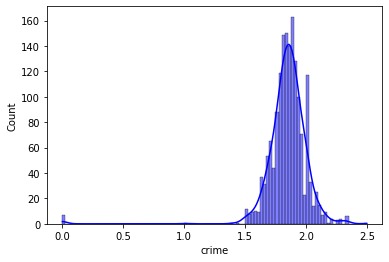

In [516]:
fig = sns.histplot(df['crime'], color='b', bins=100,kde=True)
fig

### Distribution of All Features

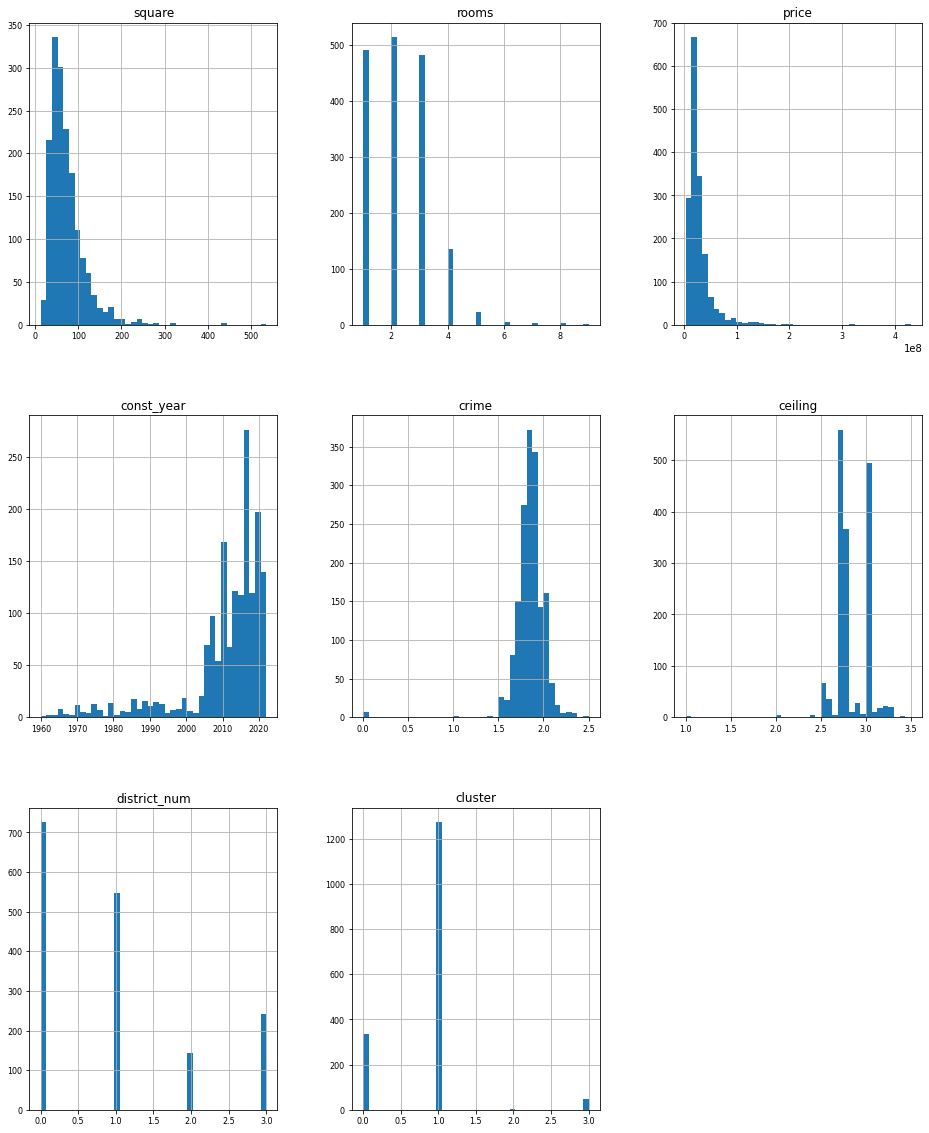

In [520]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8);

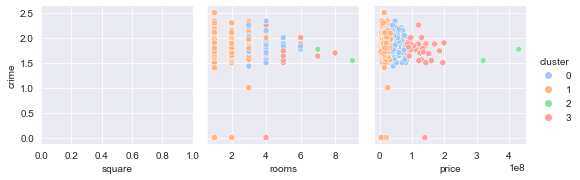

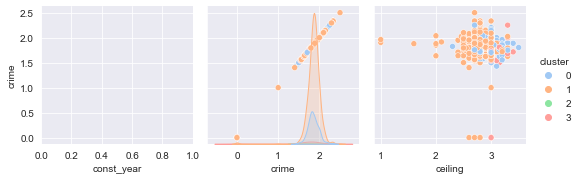

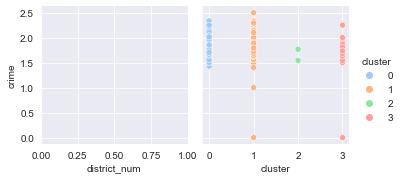

In [693]:
#ploting the correlation of all features against crime rate

for i in range(0, len(df.columns), 3):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+3],
                y_vars=['crime'],hue="cluster",palette = "pastel")


In [662]:
crimeData_corr = df.corr()['crime']
crimeData_corr

square         -0.092742
rooms          -0.065687
price          -0.128004
const_year     -0.020240
crime           1.000000
ceiling        -0.095989
district_num    0.171694
cluster        -0.076964
Name: crime, dtype: float64

<AxesSubplot:>

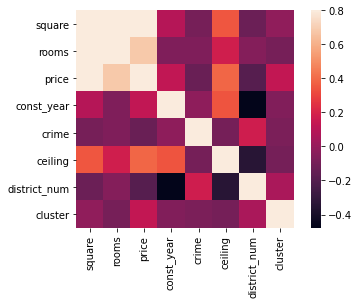

In [550]:
sns.heatmap(df.corr(),square = True,  vmax=0.8)

As explained in the above responses, finding a significant correlation is not a pre-requisite for running regression. There are many cases where two variables might not show a strong bivariate correlation but may show a strong association in regression once other variables are controlled for.

In [679]:
from sklearn.model_selection import train_test_split
y = df['crime'] 
X = df[['square','rooms','price','const_year','ceiling','district_num','cluster']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [680]:
from sklearn.linear_model import LinearRegression
model_lin_reg = LinearRegression().fit(X_train,y_train)

In [694]:
from sklearn import metrics
test_pred = model_lin_reg.predict(X_test)
r2_scoring = metrics.r2_score(y_test, test_pred)
print('R^2 =', np.round(r2_scoring,3))

R^2 = 0.056


In [672]:
df.drop(columns = ['district'],inplace = True)

c:\users\bakhtiyar\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [673]:
import statsmodels.api as sm
y = df['crime']
X = df[['district_num','const_year','cluster']]
X = sm.add_constant(X) # To add an intercept to our model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     23.95
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           3.58e-15
Time:                        06:02:18   Log-Likelihood:                 559.35
No. Observations:                1658   AIC:                            -1111.
Df Residuals:                    1654   BIC:                            -1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5133      0.849     -0.605      0.545      -2.178       1.151
district_num     0.0358      0.005      7.781      0.000       0.027       0.045
const_year       0.0012      0.000      2.779      0.006       0.000       0.002
cluster         -0.0276      0.008     -3.531      0.000      -0.043      -0.012
==============================================================================
Omnibus:                     1683.537   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168279.319
Skew:                          -4.648   Prob(JB):                         0.00
Kurtosis:                      51.472   Cond. No.                     4.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [675]:
y = df['crime']
X = df.drop(['crime'], axis=1)

X = sm.add_constant(X) 

model = sm.OLS(y, X.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     12.56
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           8.95e-16
Time:                        06:02:59   Log-Likelihood:                 567.14
No. Observations:                1658   AIC:                            -1118.
Df Residuals:                    1650   BIC:                            -1075.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7944      0.885     -0.898      0.369      -2.530       0.941
square        9.393e-05      0.000      0.297      0.766      -0.001       0.001
rooms           -0.0006      0.008     -0.078      0.938      -0.017       0.016
price        -6.326e-10   3.71e-10     -1.703      0.089   -1.36e-09    9.59e-11
const_year       0.0014      0.000      3.088      0.002       0.000       0.002
ceiling         -0.0370      0.027     -1.370      0.171      -0.090       0.016
district_num     0.0319      0.005      6.715      0.000       0.023       0.041
cluster         -0.0240      0.008     -2.863      0.004      -0.040      -0.008
==============================================================================
Omnibus:                     1688.864   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171819.654
Skew:                          -4.666   Prob(JB):                         0.00
Kurtosis:                      51.990   Cond. No.                     8.18e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [702]:
from sklearn.preprocessing import StandardScaler
X = df[['square','rooms','price','const_year','ceiling','district_num','cluster']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
model_lin_reg = LinearRegression().fit(X_train,y_train)
test_pred = model_lin_reg.predict(X_test)
r2_scoring = metrics.r2_score(y_test, test_pred)
print('R^2 =', np.round(r2_scoring,3))

R^2 = 0.047


c:\users\bakhtiyar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


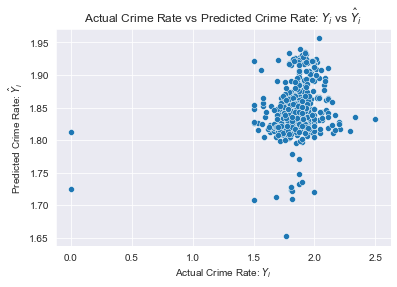

Mean Absolute Error (MAE) = 0.10435973739542884
Median Squared Error (MSE) = 0.02945717903288485
Root Mean Squared Error (RMSE) = 0.17163093844900124


In [692]:
def linearReg(x_train, y_train, x_test, y_test):
    
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    y_pred = lm.predict(x_test)

    sns.scatterplot(y_test, y_pred)
    plt.xlabel("Actual Crime Rate: $Y_i$")
    plt.ylabel("Predicted Crime Rate: $\hat{Y}_i$")
    plt.title("Actual Crime Rate vs Predicted Crime Rate: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

    print("Mean Absolute Error (MAE) = " + str(
                metrics.mean_absolute_error(y_test, y_pred)))
    print("Median Squared Error (MSE) = " + str(
                metrics.mean_squared_error(y_test, y_pred)))
    print("Root Mean Squared Error (RMSE) = " + str(
                np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


y = df['crime']
X = df.drop('crime', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

linearReg(X_train, y_train, X_test, y_test)

## Conclusions

1)Note that “Actual Crime Rate” vs “Predicted Crime Rate” plot is NOT at linear. This means, crime rate prediction is FALSE and not even close to real value. Hence, the linear model is wrong.

2)Feature Completing:combining location features into a categorical feature, adding new features based on it increased overall model accuracy.

### In the above study, i've used linear regression to predict crime rate among flats of Nur-Sultan.

How you can see, it didn't work. Dataset needs to be re-assembled, but nevertheless i learned a lot about some types of models, etc.
I think i deserve a mark 99 despite bad results of the model.